In [1]:
!date

Wed Mar 27 16:38:16 EDT 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-COMORB-CVAE/Code'

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
# %%time
# data_td = np.load('../Data/synth-data-01-TD.npy')
# data_asd = np.load('../Data/synth-data-01-ASD.npy')
# data_adhd = np.load('../Data/synth-data-01-ADHD.npy')
# data_asd_adhd = np.load('../Data/synth-data-01-ADHD_ASD.npy')
# data_comorb = np.load('../Data/synth-data-01-COMORB.npy')

In [5]:
# data_td_mean = data_td.mean(axis=0)
# data_asd_mean = data_asd.mean(axis=0)
# data_adhd_mean = data_adhd.mean(axis=0)
# data_asd_adhd_mean = data_asd_adhd.mean(axis=0)
# data_comorb_mean = data_comorb.mean(axis=0)
# #data_comorb_mean = (data_comorb-data_td).mean(axis=0)

In [6]:
# array(['tg1_2_z_features', 'tg1_2_s_features', 'tg1_2_s1_features',
#        'tg1_2_s2_features', 'tg1_z_features', 'tg1_s_features',
#        'tg1_s1_features', 'tg1_s2_features', 'tg2_z_features',
#        'tg2_s_features', 'tg2_s1_features', 'tg2_s2_features', 'recon',
#        'twins', 'recon_onlyASD', 'recon_onlyADHD', 'recon_onlyComorb',
#        'r_comorb_minus_ASD', 'r_comorb_minus_ADHD', 'mse_comorb',
#        'mse_recon', 'mse_asd', 'mse_adhd', 'corr_z_s', 'corr_s1_s',
#        'corr_s2_s', 'corr_s1_s2'], dtype='<U19')

In [7]:
analyses = [a for a in os.listdir('../tf_weights/') if not a.startswith('.')]
analyses

['baseline_VaytLnZDIU',
 'baseline_haleAXJnVs',
 'D4B1_ApwpAmfLQD',
 'V1_XHKFpcYZbl']

In [8]:
analysis_name = 'D4B1_ApwpAmfLQD'
indir = f'../tf_weights/{analysis_name}/stage_2/'
n = len([f for f in os.listdir(indir) if f.startswith('latent_recons')])
print(n)

20


In [9]:
mse_recon = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['mse_recon'][-1] for i in range(n)]
mse_asd = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['mse_asd'][-1] for i in range(n)]
mse_adhd = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['mse_adhd'][-1] for i in range(n)]
mse_comorb = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['mse_comorb'][-1] for i in range(n)]
corr_z_s = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['corr_z_s'][-1] for i in range(n)]
corr_s1_s = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['corr_s1_s'][-1] for i in range(n)]
corr_s2_s = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['corr_s2_s'][-1] for i in range(n)]
corr_s1_s2 = [np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['corr_s1_s2'][-1] for i in range(n)]

In [10]:
corrs = np.array([corr_z_s,corr_s1_s,corr_s2_s,corr_s1_s2]).transpose()

In [11]:
arr = np.array([mse_recon,mse_asd,mse_adhd,mse_comorb,corr_z_s,corr_s1_s,corr_s2_s,corr_s1_s2]).transpose()
cols = ['mse_recon','mse_asd','mse_adhd','mse_comorb','corr_z_s','corr_s1_s','corr_s2_s','corr_s1_s2']
df = pd.DataFrame(arr.round(2),columns=cols)

In [12]:
idx = (np.array(corr_s1_s)<.1) * (np.array(corr_s2_s)<.1) * (np.array(corr_s1_s2)<.1)
df['idx'] = idx
idx = np.nonzero(idx)[0]
print(len(idx))

5


In [13]:
idx = np.arange(n)

In [14]:
df

,mse_recon,mse_asd,mse_adhd,mse_comorb,corr_z_s,corr_s1_s,corr_s2_s,corr_s1_s2,idx
0,0.96,0.70,0.75,0.67,0.09,0.08,0.12,-0.01,False
1,0.96,0.68,0.75,0.64,0.03,0.01,0.10,-0.02,False
2,0.96,0.75,0.79,0.72,-0.04,-0.01,0.02,-0.01,True
3,0.96,0.74,0.77,0.68,0.06,0.05,0.13,-0.00,False
4,0.96,0.71,0.76,0.64,0.03,0.04,0.27,0.06,False
5,0.96,0.77,0.83,0.71,-0.00,0.05,0.15,0.01,False
6,0.96,0.75,0.80,0.70,0.01,0.03,0.04,-0.01,True
7,0.96,0.71,0.73,0.65,0.18,0.03,0.12,0.01,False
8,0.96,0.76,0.79,0.76,-0.01,0.05,0.04,0.04,True
9,0.96,0.72,0.79,0.63,0.09,0.01,0.11,0.07,False


In [29]:
calc_or_load = 'load'
if calc_or_load == 'calc':
    print('0/5')
    recons = np.array([np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['recon'].mean(axis=0) for i in idx]).mean(axis=0)
    print('1/5')
    twins = np.array([np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['twins'].mean(axis=0) for i in idx]).mean(axis=0)
    print('2/5')
    recon_onlyASD = np.array([np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['recon_onlyASD'].mean(axis=0) for i in idx]).mean(axis=0)
    print('3/5')
    recon_onlyADHD = np.array([np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['recon_onlyADHD'].mean(axis=0) for i in idx]).mean(axis=0)
    print('4/5')
    recon_onlyComorb = np.array([np.load(os.path.join(indir,f'latent_recons_{i}.npz'))['recon_onlyComorb'].mean(axis=0) for i in idx]).mean(axis=0)
    print('5/5')
    
    np.save('../Data/CVAE-comorb-recons.npy',recons)
    np.save('../Data/CVAE-comorb-twins.npy',twins)
    np.save('../Data/CVAE-comorb-recon_onlyASD.npy',recon_onlyASD)
    np.save('../Data/CVAE-comorb-recon_onlyADHD.npy',recon_onlyADHD)
    np.save('../Data/CVAE-comorb-recon_onlyComorb.npy',recon_onlyComorb)
else:
    recons = np.load('../Data/CVAE-comorb-recons.npy')
    twins = np.load('../Data/CVAE-comorb-twins.npy')
    recon_onlyASD = np.load('../Data/CVAE-comorb-recon_onlyASD.npy')
    recon_onlyADHD = np.load('../Data/CVAE-comorb-recon_onlyADHD.npy')
    recon_onlyComorb = np.load('../Data/CVAE-comorb-recon_onlyComorb.npy')

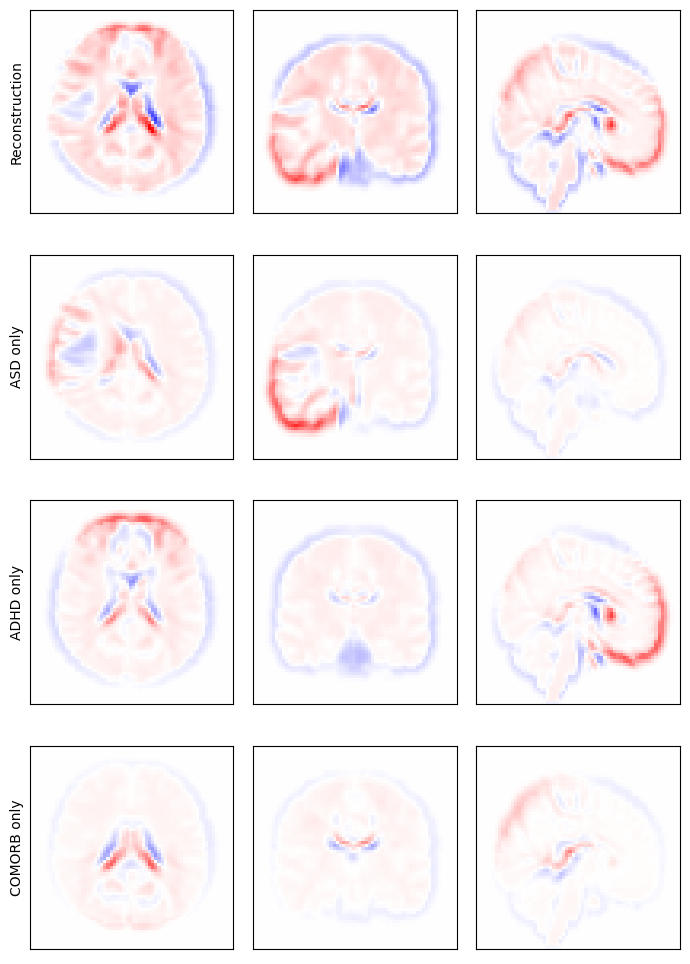

In [30]:
cmap = 'bwr'
vmin = -.4
vmax = .4

plt.figure(figsize=(7,10))

mat = (recons-twins)#.mean(axis=0)
plt.subplot(4,3,1)
plt.imshow(np.rot90(mat[:,:,32]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])
plt.ylabel('Reconstruction')

plt.subplot(4,3,2)
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.subplot(4,3,3)
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])


mat = (recon_onlyASD-twins)#.mean(axis=0)
plt.subplot(4,3,4)
plt.imshow(np.rot90(mat[:,:,32]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])
plt.ylabel('ASD only')

plt.subplot(4,3,5)
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.subplot(4,3,6)
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

mat = (recon_onlyADHD-twins)#.mean(axis=0)
plt.subplot(4,3,7)
plt.imshow(np.rot90(mat[:,:,32]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])
plt.ylabel('ADHD only')

plt.subplot(4,3,8)
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.subplot(4,3,9)
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

mat = (recon_onlyComorb-twins)#.mean(axis=0)
plt.subplot(4,3,10)
plt.imshow(np.rot90(mat[:,:,32]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])
plt.ylabel('COMORB only')

plt.subplot(4,3,11)
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.subplot(4,3,12)
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.tight_layout()
#plt.savefig(os.path.join(save_dir,f'neuroplots_{iter}.png'))

([], [])

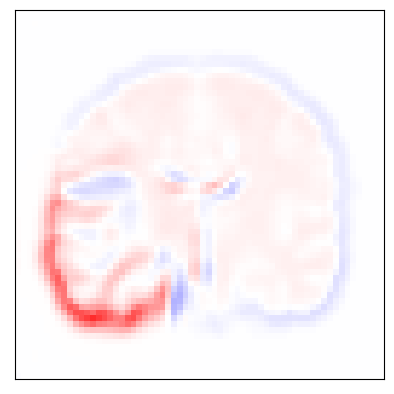

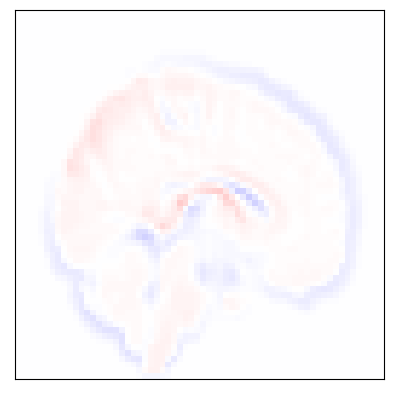

In [31]:
mat = (recon_onlyASD-twins)#.mean(axis=0)
plt.figure()
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.figure()
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

([], [])

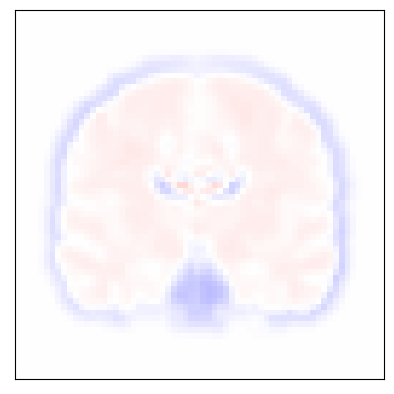

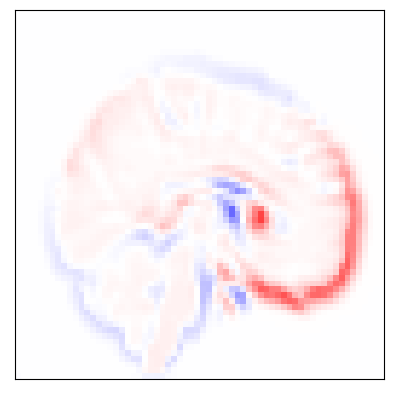

In [32]:
mat = (recon_onlyADHD-twins)#.mean(axis=0)
plt.figure()
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.figure()
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

([], [])

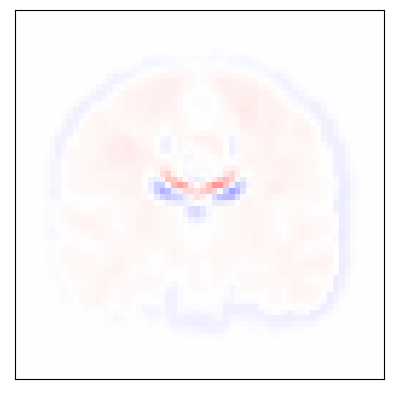

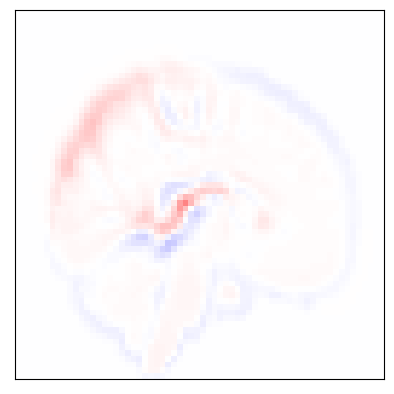

In [33]:
mat = (recon_onlyComorb-twins)#.mean(axis=0)
plt.figure()
plt.imshow(np.rot90(mat[:,32,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])

plt.figure()
plt.imshow(np.rot90(mat[32,:,:]),cmap=cmap,vmin=vmin,vmax=vmax);plt.xticks([]);plt.yticks([])